## iGraph tutorial

This notebook is for using the python bindings for iGraph, if you prefer R (ugh!) or even C/C++ (OMG!) refer to the corresponding documentation.

If you want to install python-igraph on windows or mac you should follow the documentation instructions http://igraph.org/python/#startpy

To generate scalable vector graphs (SVG) with the plot methods you need *pycairo* (it is not instalable using pip, you have to download it from http://cairographics.org/pycairo/) and the library *cairo* has to be installed in your linux). We will avoid using pycairo generating png files instead.

In this notebook it is also used `numpy` and `matplotlib`

Apart from this notebook, the tutorial for iGraph is a good starting point http://igraph.org/python/doc/tutorial/tutorial.html

In [1]:
import sys
print(sys.version)
print(sys.version_info)

3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=6, releaselevel='final', serial=0)


In [3]:
#!pip3 install igraph --user
#!pip3 install pycairo --user
#!pip3 install python-igraph --user
#!pip3 install matplotlib

   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
    --------------------------------------- 0.0/2.5 MB 653.6 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/2.5 MB 2.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.5 MB 2.9 MB/s eta 0:00:01
   -------- ------------------------------- 0.5/2.5 MB 3.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.5 MB 3.9 MB/s eta 0:00:01
   -------------- ------------------------- 0.9/2.5 MB 3.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.5 MB 4.1 MB/s eta 0:00:01
   -------------------- ------------------- 1.3/2.5 MB 4.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.5/2.5 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.5 MB 4.4 MB/s eta 0:00:01
   ---------------------

In [4]:
import igraph
from igraph import Graph

---
## 1. Creating and manipulating graphs

Creating a graph is simple, this is an **empty** graph (print returns a representation of the graph)

In [5]:
g = Graph()
print(g)

IGRAPH U--- 0 0 --


We can add vertices like for example, vertices from [0..3]

In [6]:
g.add_vertices(4)
print(g)

IGRAPH U--- 4 0 --


and some edges among them (as a list of pairs)

In [7]:
g.add_edges([(1,2), (1,3), (2,3), (3, 0)])
print(g)

IGRAPH U--- 4 4 --
+ edges:
1--2 1--3 2--3 0--3


Class `Graph` provides a couple of iterators to traverse the vertices (**vs**) and the edges (**es**)

In [8]:
for v in g.vs:
    print(v)

igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 2, {})
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 3, {})


In [8]:
for e in g.es:
    print(e)

igraph.Edge(<igraph.Graph object at 0x1165e7950>, 0, {})
igraph.Edge(<igraph.Graph object at 0x1165e7950>, 1, {})
igraph.Edge(<igraph.Graph object at 0x1165e7950>, 2, {})
igraph.Edge(<igraph.Graph object at 0x1165e7950>, 3, {})


Properties can be attached to the vertices (and the edges)

In [9]:
for i, v in enumerate(g.vs):
    v['name'] = str(i)
for v in g.vs:
    print(v)
    print(v.attributes())

igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 0, {'name': '0'})
{'name': '0'}
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 1, {'name': '1'})
{'name': '1'}
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 2, {'name': '2'})
{'name': '2'}
igraph.Vertex(<igraph.Graph object at 0x000002B42DB00150>, 3, {'name': '3'})
{'name': '3'}


In [35]:
import random
for edge in g.es:
    edge['weight'] = random.randint(1,10)
for edge in g.es:
    print(edge)
    print(edge['weight'])

igraph.Edge(<igraph.Graph object at 0x000002B42DB00150>, 0, {'weight': 2, 'width': 2})
2
igraph.Edge(<igraph.Graph object at 0x000002B42DB00150>, 1, {'weight': 5, 'width': 2})
5
igraph.Edge(<igraph.Graph object at 0x000002B42DB00150>, 2, {'weight': 2, 'width': 4})
2
igraph.Edge(<igraph.Graph object at 0x000002B42DB00150>, 3, {'weight': 6, 'width': 3})
6


Class `Graph` has methods to compute properties of a graph and many useful algorithms (https://igraph.org/python/doc/api/igraph.Graph.html)


In [28]:
g.degree()

[1, 2, 2, 3]

In [29]:
g.edge_betweenness()

[1.0, 2.0, 2.0, 3.0]

---
## 2. Plotting graphs

Plotting the graph is a little bit more complicated because by default it uses the Cairo library.

If the cairo library is not installed on your machine, we can circunvent this problem by generating a `png` file and loading it in the notebook. There are different styles and layouts for plotting a graph, you can look for the parameters in the documentation of the plot function in the Graph class.

If the cairo library is installed on your computer, then saving the `.png` file and displaying it is not necessary.

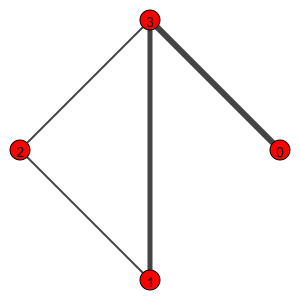

In [36]:
from IPython import display
from igraph import plot

# with cairo:

g.vs['label'] = g.vs['name']
g.es['width'] = g.es['weight']
plot(g, layout = g.layout_circle(), bbox = (300,300))

---
## 3. Graph Generators

iGraph implements several graph generators (Erdos-Renyi, Barabasi, Watts-Strogratz, ...). This should be very useful to solve your lab tasks for today.

Different layouts can be used for plotting the graphs; these layouts define where vertices are places (in 2D) in order to visualize your generated networks.

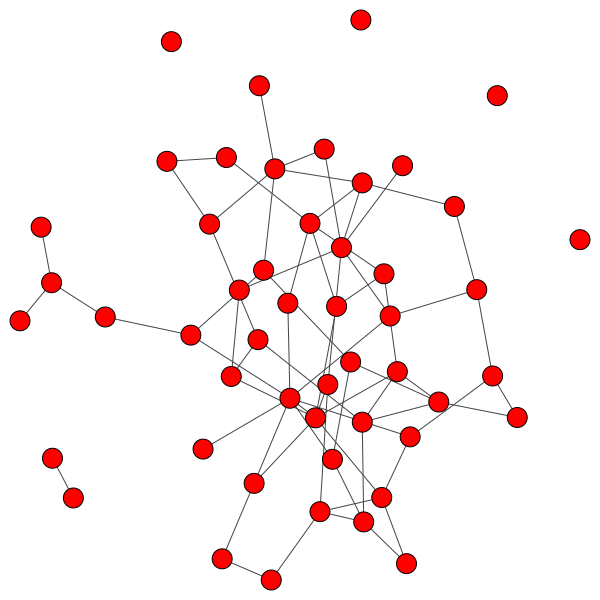

In [39]:
erdos = Graph.Erdos_Renyi(50,0.05)
plot(erdos)

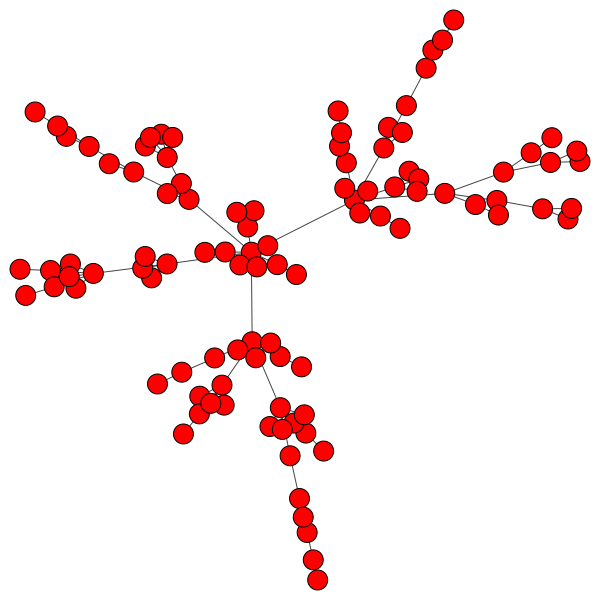

In [43]:
barabasi = Graph.Barabasi(100,1)
plot(barabasi, layout = barabasi.layout_fruchterman_reingold())

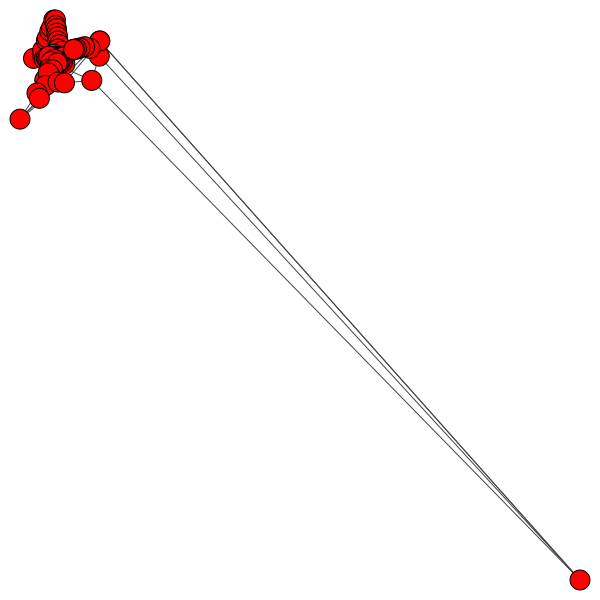

In [47]:
watts = Graph.Watts_Strogatz(1,100,2,0.05)
plot(watts, layout = watts.layout_lgl())

---
## 4. Measuring graphs

There are many measures that help us understand and characterize networks. We have seen three in class: _diameter_ (or _average path length_), _clustering coefficient_ (or _transitivity_), and _degree distribution_. `igraph` provides functions that compute these measures for you. 

The examples below illustrate the usage of these functions.

#### For a lattice network

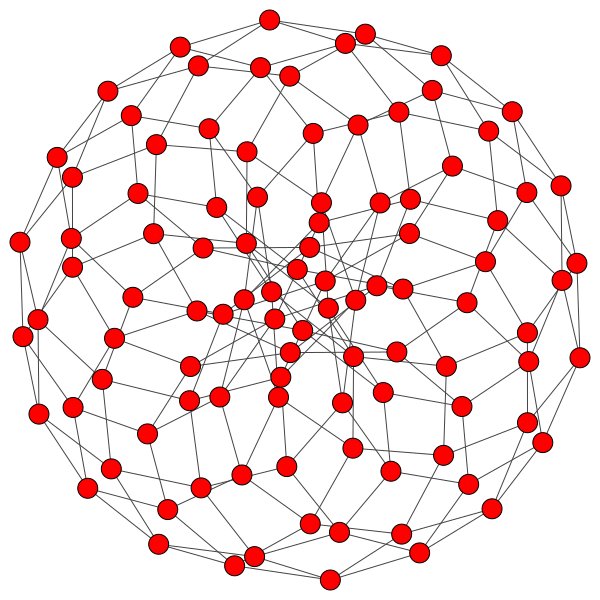

In [17]:
lattice = Graph.Lattice([10,10])
plot(lattice, layout=lattice.layout_kamada_kawai())

In [18]:
lattice.diameter(), lattice.average_path_length()

(10, 5.05050505050505)

In [19]:
# here we rewire 20% of the edges randomly, and see how it affects the average path length and diameter (should shrink)

lattice.rewire_edges(0.2)
lattice.diameter(), lattice.average_path_length()

(7, 3.556767676767677)

#### For a Watts-Strogatz graph

In [20]:
p_hat = len(watts.es)/(len(watts.vs)*len(watts.vs)/2)
p_hat, watts.transitivity_undirected()

(0.04, 0.38461538461538464)

#### For a ER graph

In [21]:
p_hat = len(erdos.es)/(len(erdos.vs)*len(erdos.vs)/2)
p_hat, erdos.transitivity_undirected()

(0.0448, 0.06666666666666667)

#### For a Ring graph

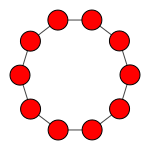

In [22]:
ring = Graph.Ring(10)
plot(ring, layout=ring.layout_kamada_kawai(), bbox=(150,150))

In [23]:
p_hat = len(ring.es)/(len(ring.vs)*len(ring.vs)/2)
p_hat, ring.transitivity_undirected()

(0.2, 0.0)

In [24]:
ring.degree()

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

#### For a BA graph

In [25]:
barabasi = Graph.Barabasi(1000,3)
p_hat = len(barabasi.es)/((len(barabasi.vs)-1)*len(barabasi.vs)/2.0)
p_hat, barabasi.transitivity_undirected()

(0.005993993993993994, 0.02034782608695652)

In [26]:
# generate ER graph with same nr of vertices and approximately same number of edges as BA network
erdos = Graph.Erdos_Renyi(1000, p_hat)

In [27]:
import numpy as np
h, b = np.histogram(erdos.degree(), bins=np.max(erdos.degree()), density=True)
print(h)
print(b)

[0.002 0.016 0.039 0.09  0.134 0.183 0.159 0.134 0.092 0.074 0.036 0.022
 0.01  0.004 0.005]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


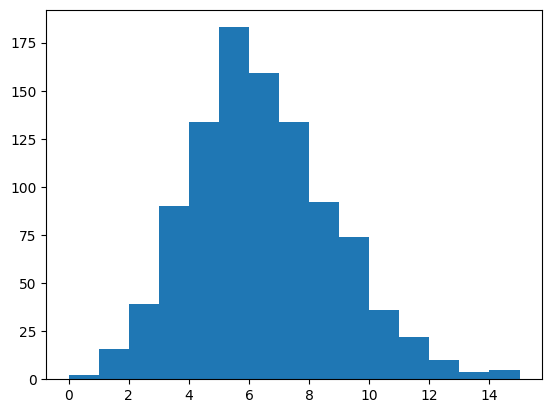

In [28]:
import matplotlib.pyplot as plt

r = plt.hist(erdos.degree(), bins=np.max(erdos.degree()))

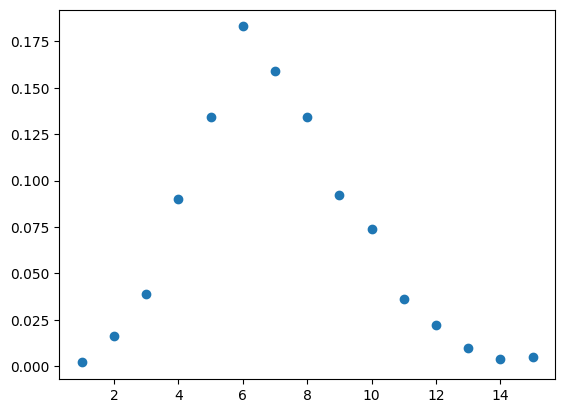

In [29]:
r = plt.plot(b[1:], h, 'o' )

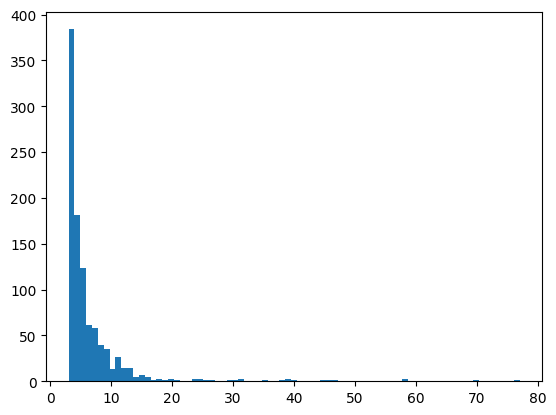

In [30]:
r = plt.hist(barabasi.degree(), bins=np.max(barabasi.degree()))

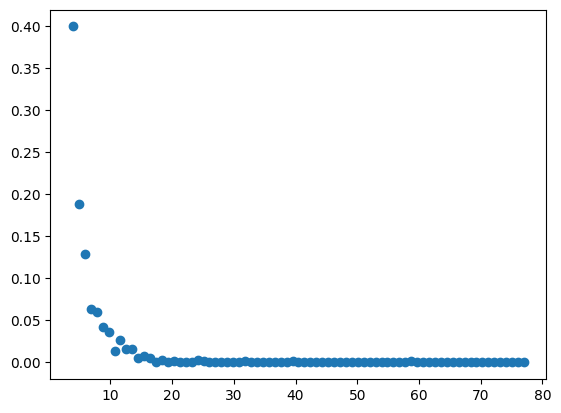

In [31]:
h, b = np.histogram(barabasi.degree(), bins=np.max(barabasi.degree()), density=True)
r = plt.plot(b[1:], h, 'o')

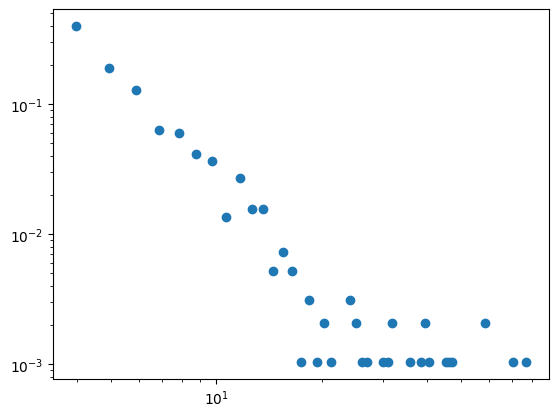

In [32]:
r = plt.loglog(b[1:], h, 'o')

---
## 5. Node centrality

First we creeate a graph following the Erdos-Reny model

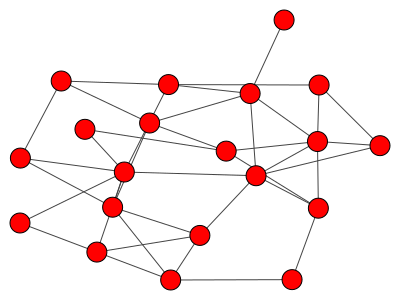

In [33]:
erdos = Graph.Erdos_Renyi(20,0.2)

plot(erdos, layout = erdos.layout_kamada_kawai(), bbox=(400,300))

#### **Betweenness** centrality

In [34]:
erdos.betweenness()

[3.5333333333333337,
 11.866666666666667,
 1.2,
 3.916666666666666,
 15.2,
 8.416666666666666,
 24.900000000000002,
 8.566666666666666,
 17.349999999999998,
 34.633333333333326,
 6.116666666666665,
 11.0,
 3.3666666666666667,
 0.0,
 0.0,
 3.5833333333333335,
 17.2,
 46.233333333333334,
 2.783333333333333,
 16.133333333333336]

#### **Degree** centrality

In [35]:
erdos.degree()

[2, 4, 3, 3, 4, 4, 5, 4, 5, 6, 4, 4, 3, 2, 1, 3, 4, 7, 2, 6]

#### **Closeness** centrality

In [36]:
erdos.closeness()

[0.4222222222222222,
 0.4634146341463415,
 0.4222222222222222,
 0.4318181818181818,
 0.48717948717948717,
 0.4222222222222222,
 0.48717948717948717,
 0.475,
 0.5,
 0.5757575757575758,
 0.4318181818181818,
 0.4634146341463415,
 0.41304347826086957,
 0.40425531914893614,
 0.3333333333333333,
 0.40425531914893614,
 0.475,
 0.5757575757575758,
 0.38,
 0.5]

####  **Pagerank** centrality

In [37]:
erdos.pagerank()

[0.02929827913844731,
 0.05228157165075473,
 0.039870872014221244,
 0.04045798966150956,
 0.05241188393263913,
 0.05285080438585884,
 0.06672987225805628,
 0.050943329667551544,
 0.06275110746839022,
 0.07319615022253463,
 0.05259007459327589,
 0.05272492970754663,
 0.040502172836918274,
 0.029269622426664782,
 0.018844078283869567,
 0.04128024641043378,
 0.052609995312879645,
 0.08724661297547714,
 0.02984062990778039,
 0.07429977714519054]

---
## 6. Community detection


In [38]:
com = erdos.community_edge_betweenness()
print ('Clusters:', com.optimal_count) # Optimal number of clusters from the dendrogram

Clusters: 6


the `as_clustering` method of the dendrogram "cuts" the dendogramobject returns a graph with the clusters:

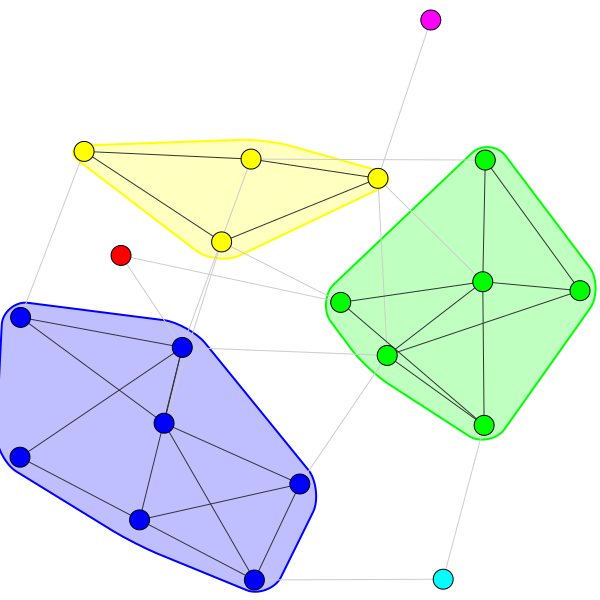

In [39]:
r = plot(com.as_clustering(), layout = erdos.layout_kamada_kawai(),mark_groups=True, target="./coms.png")
display.Image(filename="./coms.png")

You can also obtain the clusters and their vertices

In [40]:
for d in com.as_clustering():
    print(d)

[0]
[1, 2, 9, 11, 12, 19]
[3, 5, 7, 8, 10, 13, 17]
[4, 6, 15, 16]
[14]
[18]


In [41]:
print(com.as_clustering())

Clustering with 20 elements and 6 clusters
[0] 0
[1] 1, 2, 9, 11, 12, 19
[2] 3, 5, 7, 8, 10, 13, 17
[3] 4, 6, 15, 16
[4] 14
[5] 18
